In [1]:
from backtest.Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# ** THIS IS THE ONLY AREA YOU NEED TO CHANGE**

ticker = "BTC" # CHANGE THE CRYPTO YOU WANT TO TEST FROM EITHER OF THE FOLLOWING ("BTC", "ETH")

BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

In [3]:
strategy = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')

In [4]:
# strategy.daily_inside_candle_strategy_long_win_loss_ratio(cur_date="2017-08-17", end_date="2024-03-31", loss=0.03, ratio=1)

strategy.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=3)

# strategy.daily_inside_candle_strategy_long_ema_win_loss_ratio(cur_date="2017-08-17", end_date="2024-03-31", loss=0.03, ratio=1, ema=20)

# strategy.daily_inside_candle_strategy_long_ema_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", ema=20)

In [5]:
strategy.stockAccount.get_strategy_info()

{'average_return_per_trade': 3.8821591654498966,
 'accumulated_return': 521.9673667750992,
 'win_ratio': 33.33333333333333,
 'max_win': 89.43039342347849,
 'max_loss': -15.090395916603331,
 'total_trade': 72}

In [6]:
strategy.stockAccount.get_transaction() # transactions

[{'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 8, 29, 0, 0),
  'price': 4353.65,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 3, 0, 0),
  'price': 4508.5,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 19, 0, 0),
  'price': 4060.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 22, 0, 0),
  'price': 3592.84,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 26, 0, 0),
  'price': 3928.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 10, 19, 0, 0),
  'price': 5513.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 10, 30, 0, 0),
  'price': 6133.01,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 11, 11, 0, 0),
  'price': 6503.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',

In [7]:
def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

df_pls = pls_visualize(strategy.stockAccount.get_pls())
df_pls

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-09-03,4508.50,True,154.85,3.556786
1,BTC/USDT,2017-09-19,4060.00,2017-09-22,3592.84,True,-467.16,-11.506404
2,BTC/USDT,2017-09-26,3928.00,2017-10-19,5513.00,True,1585.00,40.351324
3,BTC/USDT,2017-10-30,6133.01,2017-11-11,6503.00,True,369.99,6.032764
4,BTC/USDT,2017-11-26,8700.04,2017-12-21,16480.52,True,7780.48,89.430393
...,...,...,...,...,...,...,...,...
67,BTC/USDT,2023-10-17,28500.77,2023-12-12,41253.41,True,12752.64,44.744896
68,BTC/USDT,2023-12-22,43861.79,2023-12-25,42991.50,True,-870.29,-1.984164
69,BTC/USDT,2024-01-09,46951.04,2024-01-13,42782.74,True,-4168.30,-8.877972
70,BTC/USDT,2024-01-27,41823.51,2024-02-23,51288.42,True,9464.91,22.630597


In [8]:
accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result

,date,pl_percent
0,2017-08-29,3.556786
1,2017-09-19,-8.358876
2,2017-09-26,28.619530
3,2017-10-30,36.378842
4,2017-11-26,158.342978
...,...,...
67,2023-10-17,457.623005
68,2023-12-22,446.558848
69,2024-01-09,398.035509
70,2024-01-27,510.743917


([<matplotlib.axis.XTick at 0x7f9a4120bb20>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17897.0, 0, '2019-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19358.0, 0, '2023-01-01'),
  Text(19723.0, 0, '2024-01-01')])

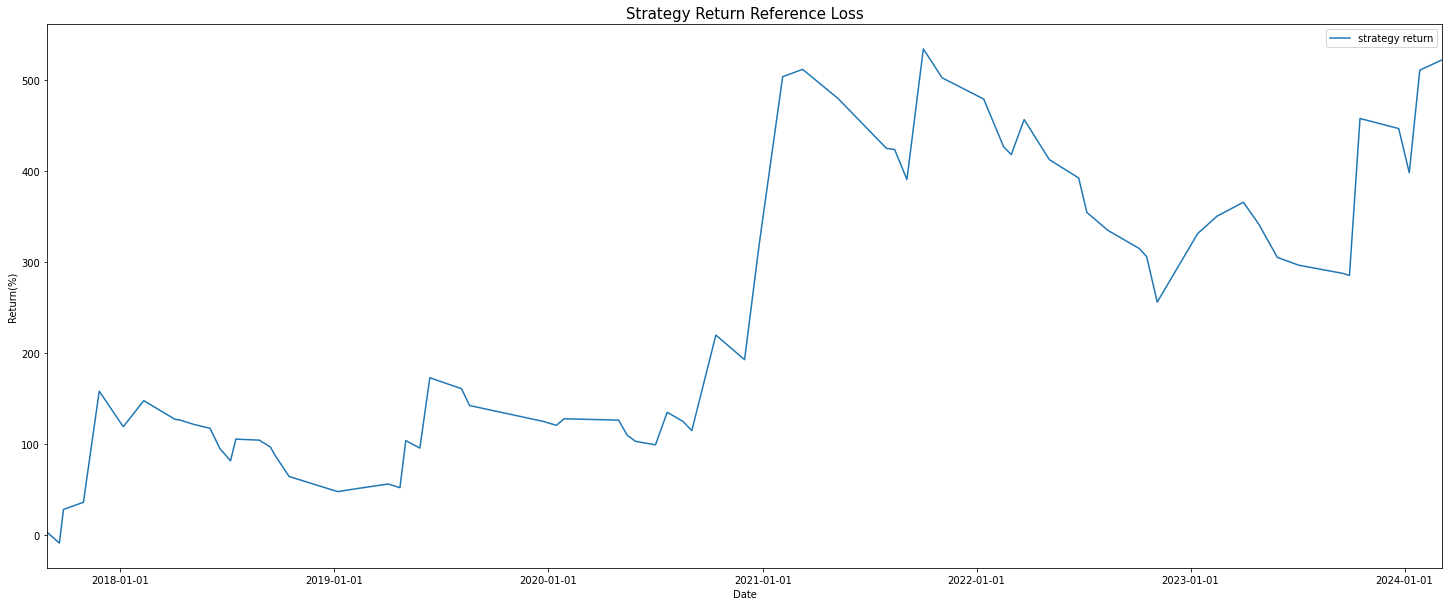

In [10]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="strategy return")
# plt.plot(result.index, result['pl_percent'], label="strategy return")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
plt.xticks(ticks)

In [ ]:
# df_pls.tail(50)
# df_pls.head(50)

In [ ]:
# x = strategy.file_name
# # x.head(50)
# x = x.loc['2017-10-02': '2024-03-11']
# x.tail(50)

In [ ]:
# x = x[x['buyORsell']==1]
# x

In [ ]:
# len(x)

In [ ]:
# win = 0
# loss = 0
# for i in strategy.stockAccount.get_pls():
#     if i['pl_percent'] > 0:
#         win += 1
#     else:
#         loss += 1

# print(win)
# print(loss)
# print((win / loss) * 100)